# Name :Priya S Kulkarni

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [113]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading data from remote link

In [114]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [115]:
data.shape

(25, 2)

In [116]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [117]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [118]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

c:\users\priya kulkarni\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


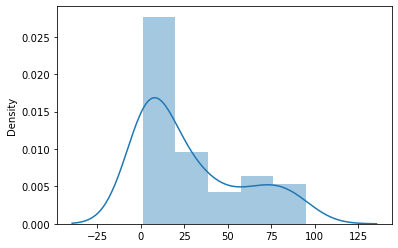

In [119]:
import seaborn as sns
sns.distplot(data)
plt.show()

<Figure size 2160x2160 with 0 Axes>

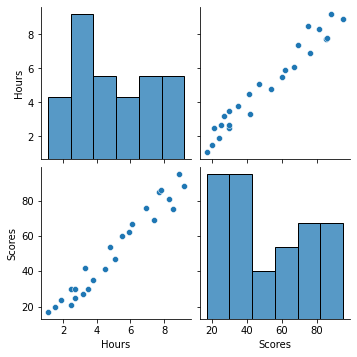

In [120]:
plt.figure(figsize = (30,30))
sns.pairplot(data)
plt.show()

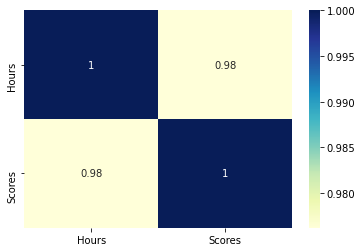

In [121]:

sns.heatmap(data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

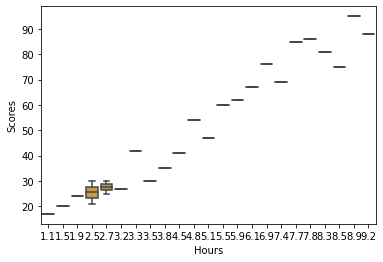

In [122]:
sns.boxplot(x = 'Hours', y = 'Scores', data = data)

Plotting the distribution of scores

<AxesSubplot:xlabel='Hours'>

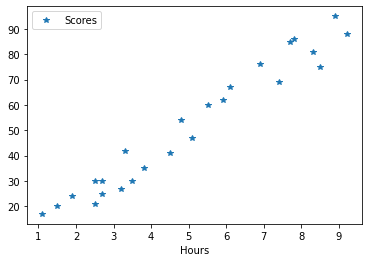

In [123]:
data.plot(x = 'Hours', y = 'Scores',style="*")

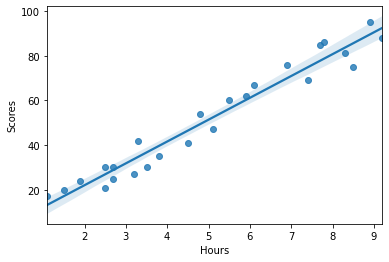

In [124]:
sns.regplot(x="Hours", y="Scores", data=data);

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

# Preparing Data 

The next step is to divide the data into inputs and outputs.

In [125]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [126]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [127]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

the next step is to split this data into training and test sets

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [130]:
X_train.shape

(17, 1)

In [131]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [132]:
X_test.shape

(8, 1)

## Training the data

In [133]:
from sklearn.linear_model import LinearRegression  
rg = LinearRegression()  
rg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [134]:
print(rg.intercept_)

2.370815382341881


In [135]:
print(rg.coef_)

[9.78856669]


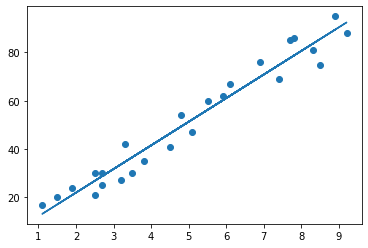

In [136]:
# Plotting the regression line
line = rg.coef_*X+rg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


## Making Predictions

In [137]:
y_pred = rg.predict(X_test)

In [138]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [139]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

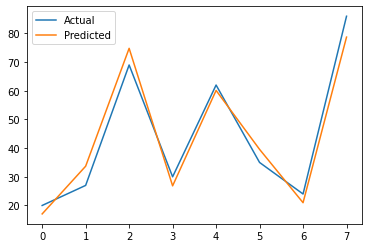

In [140]:
df.plot()

In [141]:
hours = [[8.2]]
own_pred = rg.predict(hours)
own_pred

array([82.63706221])

## Evaluating the model
The final step is to evaluate the performance of algorithm.

In [142]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


In [143]:
rg.score(X_test, y_test)

0.9568211104435257